## Downsample the large tif images to (512,512)

In [10]:
# Dependencies
import xml.etree.ElementTree as ET
import numpy as np
import glob
import cv2
import sys
import time

import colony_iomethods as cm

from matplotlib import pyplot as plt

In [13]:
# Folder for the files
exp_name = "EQ59_01072021_12am"
acq_name = "First12h"
# acq_name = "Interval12-36h_10pm"

base_folder = f"D:/Tolga/Colony Images/{exp_name}/{acq_name}/"

# Replace the metadata_path with
metadata_path = base_folder + f"MetaData/{exp_name}_{acq_name}_Properties.xml"

tree = ET.parse(metadata_path)    # xml tree of the current stage position
root = tree.getroot()           # root of the xml tree

image = root[0]

# Merged images folder
merged_folder = base_folder + "Merged/"
# Downsampled images folder
downsampled_folder = base_folder + "Downsampled/"

In [19]:
merged_path = merged_folder + f"{acq_name}_t00_z000.tif"
# Image dimension description
dim_desc = cm.collectImageDim(image)

img_test = cv2.imread(merged_path)
(height, width, layers) = img_test.shape

resize_dim = (512,512)
scale = resize_dim[0]/height


In [21]:
# For a set number of t
dim_desc["tsz"] = 1
# For a set number of z
# dim_desc["zsz"] = 1
for tix in range(dim_desc["tsz"]):
    t_str = "t%02d" % (tix+12)
    img_zsum = np.zeros(dim_desc["zsz"])
    for zix in range(dim_desc["zsz"]):
        z_str = "z%03d" % (zix)
        merged_path = merged_folder + f"{acq_name}_{t_str}_{z_str}.tif"
        downsampled_path = downsampled_folder + f"{acq_name}_{t_str}_{z_str}.tif"
        print(f"Loading file = {merged_path}", end="\r", flush=True)
        
        img = cv2.imread(merged_path)
        while (type(img) == type(None)):
            time.sleep(1) # wait 1 sec and retry
            img = cv2.imread(merged_path)
        img_blur = cv2.GaussianBlur(img, (11,11),0)
        img_thresh = cv2.accumulate

        # Resize for video output
        img_resized = cv2.resize(img_blur, dim_vid)
        cv2.imwrite(downsampled_path, img_resized)

In [22]:
merged_path

'D:/Tolga/Colony Images/EQ59_01072021_12am/First12h/Merged/First12h_t12_z117.tif'

In [37]:
merged_path = merged_folder + f"{acq_name}_{t_str}_z040.tif"
img = cv2.imread(merged_path, cv2.IMREAD_GRAYSCALE)

<IPython.core.display.Javascript object>


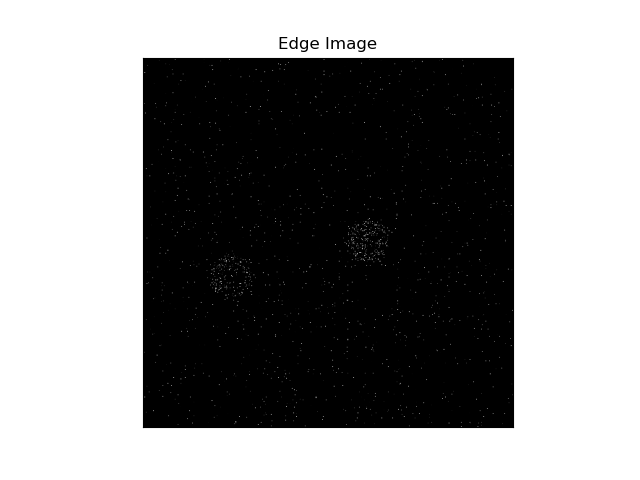

<ipython-input-83-997fb0f390e9>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111),plt.imshow(img_resized,cmap = 'gray')


(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

In [83]:

edges = cv2.Canny(img, 5, 20)
# plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
img_resized = cv2.resize(edges,(512,512))
plt.subplot(111),plt.imshow(img_resized,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

<IPython.core.display.Javascript object>


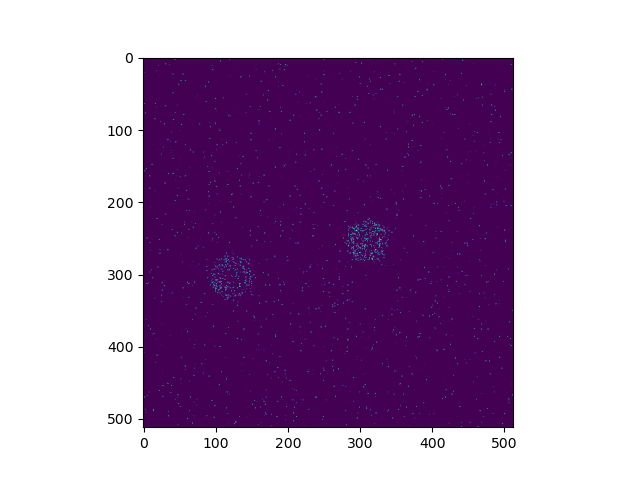

In [80]:
img2 = cv2.GaussianBlur(img, (11,11), 0)
_,img2 = cv2.threshold(img2, 5, 255, cv2.THRESH_BINARY)
img2 = cv2.resize(img2, resize_dim)
plt.imshow(img2)

<IPython.core.display.Javascript object>


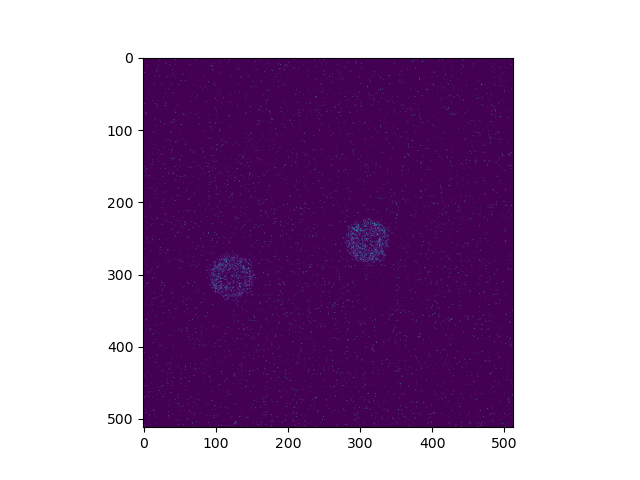

In [48]:
plt.imshow(img_resized)